# Prime numbers and the sieve of Eratosthenes
_Author: An enthusiastic scientist, a terrible programmer._

The sieve of Eratosthenes is a simple and famous algorithm for factoring prime
numbers. I was always fascinated with prime numbers, so I am very excited about new project!

Let's start with a simple implementation of the Sieve or Eratosthenes:

In [1]:
from sievetools import sieve

In [2]:
%%time

nmax = 55
_ = sieve.sieve_1(nmax)



CPU times: user 220 µs, sys: 111 µs, total: 331 µs
Wall time: 304 µs


Now, let's do something a little bit more efficient. This code should give me the same than before, but in less time. 

In [3]:
%%time 

_ = sieve.sieve_2(nmax)

CPU times: user 14 µs, sys: 7 µs, total: 21 µs
Wall time: 23.1 µs


## Long Run: proportion of primer numbers

Now I am interested in knowing what is the proportion of prime numbers smaller than some `nmax`. This next for loop runs the last implementation of the sieve of Eratosthenes for different numbers. 

In [4]:
import numpy as np

In [5]:
%%time 

all_nmax = np.arange(100, 5000, 100)
all_proportions = sieve.proportion_primes(all_nmax)

CPU times: user 14.4 ms, sys: 163 µs, total: 14.6 ms
Wall time: 14.3 ms


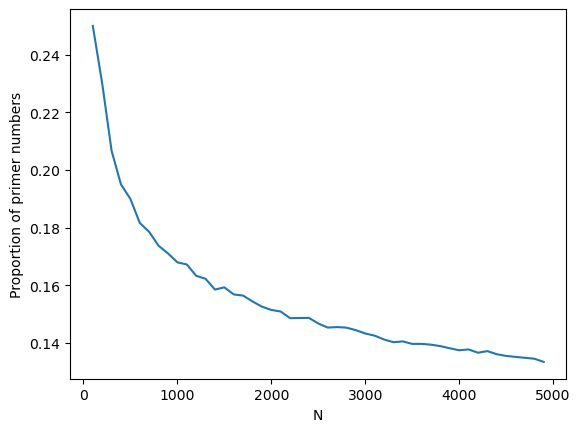

In [6]:
from sievetools import plots

plots.prime_prop(all_nmax, all_proportions)

OIn theory this should look like $1 / ln(N)$. Let's make the plot in log scale, since it seems more meaninful in this way.

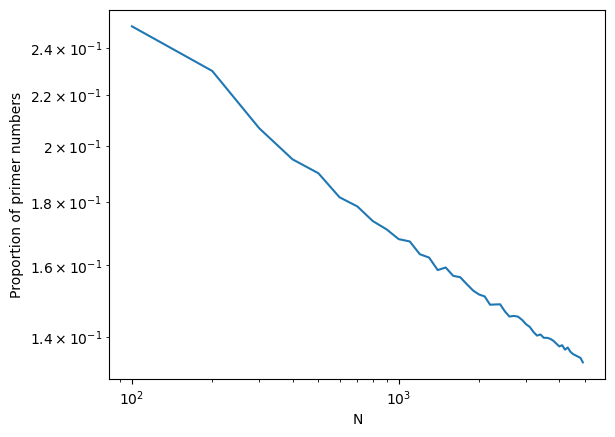

In [7]:
plots.prime_prop_log(all_nmax, all_proportions)

## Performance

It will be great to compare the performance of the two algorithms as we increase the window search. 

Write a function that computes the overall time of a program. I guess something like this should work. The function `time.perf_counter` can be useful here. 

In [8]:
from sievetools import utils

all_nmax = np.arange(100, 5000, 100)

_, times_1 = utils.time_rng(sieve.sieve_1, all_nmax)
_, times_2 = utils.time_rng(sieve.sieve_2, all_nmax)



Plot!!! Make a comparision of the two methods. 

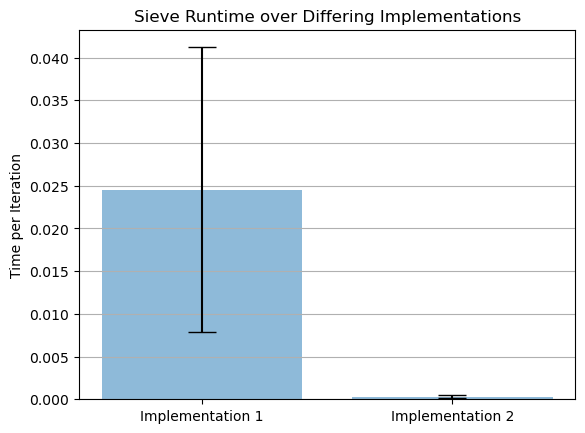

In [9]:
plots.time_comp(times_1, times_2)



## Testing

In [15]:
# Unit Test
def test_sieve_2():
    assert sieve.sieve_2(10) == [2, 3, 5, 7]
    

# Integration Test
def test_sieve_1_2():
    rand_int = np.random.randint(2, 100)
    assert sieve.sieve_1(rand_int) == sieve.sieve_2(randint)

    
# Regression Test